# Monte Carlo Simulation using Python

Below is some Python code for a Monte Carlo simulation to approximate daily future prices for a stock. 

For this project, I am using the Brownian Motion model (Markov process) to describe stock price movements. This model assumes stock prices are random variables (follow a random walk process). There are two main components of the model:

1.Drift - direction of stock prices in the past (essentially the change in average value of stock prices over time)

2.Volatility - spread of the stock prices over time (standard deviation)

Then we create a variable that generates random potential daily returns each day, where the probability of that price occuring is likely - 95%. And we explore the deviations of this random variable from mean=0 (normal distribution) for each of the randomly generated probabilities. 

To run the simulation, we have to specify the t-interval (in this case number of days we want the simulation to run for) and number of iterations. The simulation will generate potential future price paths for the stock.

The larger the number of iterations, the closer we will converge to the expected future stock price.

Using Brownian motion formulae, we can generate an array of daily random future stock prices.

Then we create a price array: price(t+1) = price(t)*simulated daily return(t+1) and set stock price at the start of the dataset = stock price at the end of the dataset.

Set up a loop starting on day 1 and ending on day 365 (we are running for 1 year)

Using this, we can plot possible price paths of the stock and calculate the expected future price of the stock.




# Python packages used
pandas - data framing

matplotlib - data visualisation

scipy.stats - statistics and probability distributions

In [38]:
#Python packages used
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline




# Pull out stock price data

The company we are using for this analysis is Netflix. The time frame under consideration is 10 years, starting from 1st January 2010.


In [39]:
#Pull out Adjusted Closing Price data for Netflix
ticker= "NFLX"
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2010-1-1')['Adj Close']

data[ticker].head() #first five rows of the dataset




Date
2010-01-04    7.640000
2010-01-05    7.358572
2010-01-06    7.617143
2010-01-07    7.485714
2010-01-08    7.614286
Name: NFLX, dtype: float64

To forecast the stock price of Netflix, we need to obtain the simple logarithmic returns.

Using a "percent change" method here to obtain simple returns.

Then, create log-returns using numpy's log and type +1 the simple returns extracted from the data.






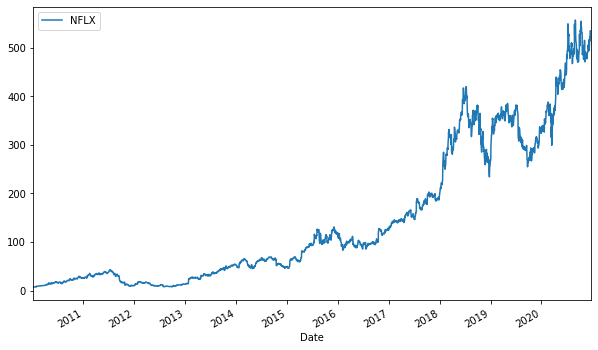

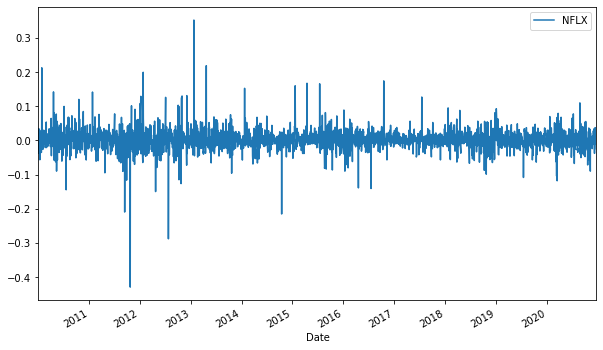

In [40]:
log_returns=np.log(1+data.pct_change()) #obtain simple logarithmic returns
log_returns.tail()

#plot of stock price
data.plot(figsize=(10,6));

#plot of log returns.
log_returns.plot(figsize=(10,6));

In the first graph, we can see that Netflix's stock price has been increasing gradually over the last decade.

The second graph indicates a normal distribution of returns with a stable mean.

# Brownian motion model


Formulas:

daily returns = e^r

r = drift + stdev * e^r

In [41]:
#calculate mean and variance of returns.
u=log_returns.mean()
u


NFLX    0.001524
dtype: float64

In [42]:
#This tells us how far stock prices are spread out from the mean.
var=log_returns.var()
var


NFLX    0.001048
dtype: float64

We will use the mean and variance to calculate the drift component.

The formula for drift used here is equal to u (average log returns of the stock) minus half its variance.




In [43]:
#drift is essentially the change in the average value of the stock prices over time.
drift=u-(0.5*var)
drift


NFLX    0.001
dtype: float64

We will then calculate the standard deviation.

Brownian motion consists of the sum of drift and variance adjusted by e^r so we will use this in the second part of the expression.

In [44]:
#This is a measure of the spread of stock prices over time.
stdev=log_returns.std()
stdev


NFLX    0.032368
dtype: float64

We have now set up the Brownian Motion element of our simulation.

Now we will run a second component which will show how a simulation can be run to predict future stock prices.

Next, we need to use the "type" function to see if drift and stdev are pandas data series.




In [45]:
#check types for drift and stdev
type(drift)



pandas.core.series.Series

In [46]:
type(stdev)

pandas.core.series.Series

Convert these values into NumPy arrays.

We can use "np.array" to do this. Alteratively, we can use ".values" after a pandas object (series or data frame) to transfer object into a NumPy array.

In [47]:
#convert the values for drift and stdev into numpy arrays. Obtain same result by adding '.values'
np.array(drift)

array([0.00099978])

In [48]:
stdev.values

array([0.03236779])

# Random variable
The second component of Brownian motion is a random variable z, corresponding to the distance between the mean and returns occuring, expressed as the number of standard deviations.

In [49]:
#create a variable that generates random potential future daily returns each day.
norm.ppf(0.95)
#event has 95% chance of occuring, distance = 1.65 standard deviations

1.6448536269514722

To complete these, we have to randomise using "rand"

2 is the number of arguments chosen here to generate a multi-dimensional array

In [50]:
#create a random variable 'x'
x=np.random.rand(10,2) # generate a multi-dimensional array by using 2 (10x2 matrix)
x


array([[0.2448415 , 0.5426072 ],
       [0.04759078, 0.14160601],
       [0.09018582, 0.56040975],
       [0.85821295, 0.50055545],
       [0.91061244, 0.38455843],
       [0.69389744, 0.93910489],
       [0.12130827, 0.39638794],
       [0.30285196, 0.63271923],
       [0.02212974, 0.87733774],
       [0.27935788, 0.84732004]])

In [51]:
#include 'x' in ppf matrix to obtain distance from mean corresponding to each of these randomly generated probabilities.
norm.ppf(x)


array([[-6.90813117e-01,  1.07004253e-01],
       [-1.66867626e+00, -1.07313172e+00],
       [-1.33961166e+00,  1.52008164e-01],
       [ 1.07232498e+00,  1.39231363e-03],
       [ 1.34453598e+00, -2.93530269e-01],
       [ 5.06928324e-01,  1.54730294e+00],
       [-1.16847173e+00, -2.62707690e-01],
       [-5.16215481e-01,  3.39063975e-01],
       [-2.01162493e+00,  1.16178078e+00],
       [-5.84750102e-01,  1.02500691e+00]])

In [52]:
z=norm.ppf(np.random.rand(10,2))
z
#used the randomly generated probabilities from x to calculate distances from mean zero.

array([[ 1.25365509,  0.17135294],
       [-0.23608603,  0.53494131],
       [ 0.61655498, -0.48148006],
       [-0.09924273, -0.3373508 ],
       [-1.7153645 ,  0.53139567],
       [-0.64645271,  1.52172852],
       [ 0.40415207, -1.21419027],
       [-0.63687485,  0.18221718],
       [-0.89949636, -0.05942483],
       [ 0.20470768, -0.41468122]])

Specify time intervals (number of days to run simulation for) 

And iterations (number of series of future stock price predictions you want to ask computer to produce).

In [53]:
#Below is number of days we want the simulation to run for (t-intervals) and the number of times we want it to run (iterations)
#The larger the iteration the closer we will get to the expected return.
t_intervals=365
iterations=10 

#dailyreturns=e^r
#r=drift + stdev*z
#Using the 2 equations above, we generate a dailyreturns array.
dailyreturns=np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
dailyreturns

#This generates a 100x10 array of random future stock prices.

array([[1.02119682, 1.01972287, 1.03108121, ..., 0.986065  , 1.02631522,
        0.991976  ],
       [0.97314605, 0.98256569, 1.03986465, ..., 0.97748343, 1.04102466,
        0.99230508],
       [0.98057892, 1.00581177, 1.00221159, ..., 1.05096163, 0.9857627 ,
        0.9685485 ],
       ...,
       [0.97360193, 0.98699234, 0.95619974, ..., 1.02424795, 0.98108956,
        0.97203058],
       [0.98558186, 1.02218818, 1.02811989, ..., 0.98088932, 0.97898697,
        1.00110232],
       [0.99601158, 0.96111798, 0.98833808, ..., 1.01950786, 0.97470478,
        1.02467071]])

To make credible stock price predictions, we must set first stock price in our dataset equal to the last price in our dataset.

S0 represents price today.

Using "i-loc" method and index operator, type -1 in the square brackets to indicate we need the last price value from the table.


In [54]:
#create price list: price(t) = price(0)*simulated daily return(t)
#Then, price(t+1)=price(t)*simulated daily return (t+1)


#We want the first stock price equal to last price in our dataset. This reflects the current market price. 
#Let this be S0.
S0=data.iloc[-1] 
S0



NFLX    514.47998
Name: 2020-12-23 00:00:00, dtype: float64

Create a NumPy array for price list with the same dimensions as dailyreturns array using "zeros like" method.

In [55]:
#Create a numpy array with same dimensions as dailyreturns array, and fill with zeros.
price_list=np.zeros_like(dailyreturns) 
price_list


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

We must set the first row of prices in the price list to S0 (starting price).

The entire row of prices must be equal to S0 as this represents the starting price for all 10 iterations to be generated.



In [56]:
#Replace zeros with expected stock prices using a loop.
#We do this by setting first row of prices equal to current market price.
price_list[0]=S0 
price_list 


array([[514.47998047, 514.47998047, 514.47998047, ..., 514.47998047,
        514.47998047, 514.47998047],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Now, we can generate values for our price list by using a loop.

Use the formula for expected stock price in time t = stock price in previous period t-1, times by daily return in time t.


In [57]:
#Set up a loop starting at day 1 & ending at day 365.
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*dailyreturns[t]
    
price_list


array([[ 514.47998047,  514.47998047,  514.47998047, ...,  514.47998047,
         514.47998047,  514.47998047],
       [ 500.6641586 ,  505.51037792,  534.98954361, ...,  502.89565614,
         535.58634889,  510.52109759],
       [ 490.94071919,  508.44828829,  536.17272001, ...,  528.5240408 ,
         527.96104491,  494.46444496],
       ...,
       [1267.75449036,  858.68231365,  287.64729073, ...,  940.78793385,
        1339.27621889,  517.24709954],
       [1249.47582379,  877.73491555,  295.73590035, ...,  922.80883741,
        1311.13397193,  517.81727046],
       [1244.49239481,  843.60681098,  292.28705167, ...,  940.81086212,
        1277.96855185,  530.59218854]])

Price list has been generated.




# Graphs

Now we can plot this on a graph using Matplotlib.


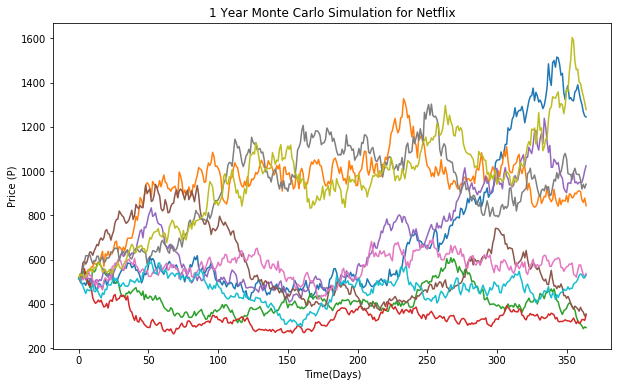

In [58]:

plt.figure(figsize=(10,6))
plt.title("1 Year Monte Carlo Simulation for Netflix")
plt.ylabel("Price (P)")
plt.xlabel("Time(Days)")
plt.plot(price_list);
#This generates a graph of 10 possible stock price paths of expected stock price of Netflix.





# Further analysis

We can further analyse the results by calculating the mean of all ending prices.

Then we will arrive at the most probable expected price.


In [60]:
mean_end_price = round(np.mean(price_list),2)
print("Expected price: ", str(mean_end_price))

Expected price:  658.28
